<a href="https://colab.research.google.com/github/shrishti452/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes

**PREPROCESSING**



**NORMALIZE THE FEATURES **



**HANDLE MISSING VALUES ( IF ANY )**



**SPLIT INTO TRAINING AND TEST SETS **

In [2]:
data = pd.read_csv("diabetes ML.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = data.drop('Outcome', axis=1).values
y = data['Outcome'].values.reshape(-1,1)   # FOR LOGISTIC REGRESSION

scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

**IMPLEMENT GRADIENT DESCENT**

LINEAR REGRESSION ( FOR PREDICTING CONTINUOUS GLUCOSE LEVEL )

In [4]:
from logging import error
def gradient_descent_linear(x,y, lr=0.01 , epochs=1000):
  m, n =x.shape
  x = np.c_[np.ones((m,1)),x] # ADD BIAS TERM
  theta = np.zeroes((n+1,1))

  for epoch in range(epochs):
    predictions = x @ theta
    error = predictions - y
    gradients = (2/m) * x.T @ error
    theta -= lr * gradients

  return theta

**LOGISTIC REGRESSION ( FOR DIABETES CLASSIFICATION )**

In [5]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

def gradient_descent_logistic(x, y, lr=0.1, epochs = 1000):
  m , n =x.shape
  x = np.c_[np.ones((m,1)),x]  # ADD BIAS
  theta = np.zeros((n+1,1))

  for epoch in range(epochs):
    z = x @ theta
    h = sigmoid(z)
    gradient = (1/m) * x.T @ (h-y)
    theta -= lr * gradient

  return theta


EVALUATION METRICS

FOR REGRESSION:

*   MEAN SQUARED ERROR (MSE)
*  R^2 SCORE







FOR CLASSIFICATION:
*   ACCURACY
*   PRECISION
*   RECALL
*   F1 SCORE








In [6]:
from sklearn.metrics import accuracy_score, classification_report

# Train the logistic regression model
theta = gradient_descent_logistic(x_train, y_train)

# Predictions
x_test_bias = np.c_[np.ones((x_test.shape[0], 1)), x_test]
preds = sigmoid(x_test_bias @ theta)
pred_labels = (preds >= 0.5).astype(int)

# Evaluation
print("Accuracy:" , accuracy_score(y_test, pred_labels))
print(classification_report(y_test, pred_labels))

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



COST vs EPOCHS ( FOR LOGISTIC REGRESSION )

**UPDATED gradient_descent_logistic Function:**

In [7]:
def compute_cost(y,h):
  m=len(y)
  epsilon = 1e-5 # TO AVOID log(0)
  cost = -(1/m) * (y.T @ np.log(h+epsilon)+ (1-y).T @ np.log(1-h + epsilon))
  return cost[0][0]

def gradient_descent_logistic(x,y ,lr=0.1, epochs=1000):
  m ,n =x.shape
  x=np.c_[np.ones((m,1)),x] # ADD BIAS
  theta = np.zeros((n+1,1))
  cost_history=[]

  for epoch in range(epochs):
    z = x @ theta
    h = sigmoid(z)
    cost = compute_cost(y,h)
    cost_history.append(cost)

    gradient = (1/m) * x.T @ (h-y)
    theta -= lr * gradient

  return theta, cost_history

PLOT: COST vs EPOCHS

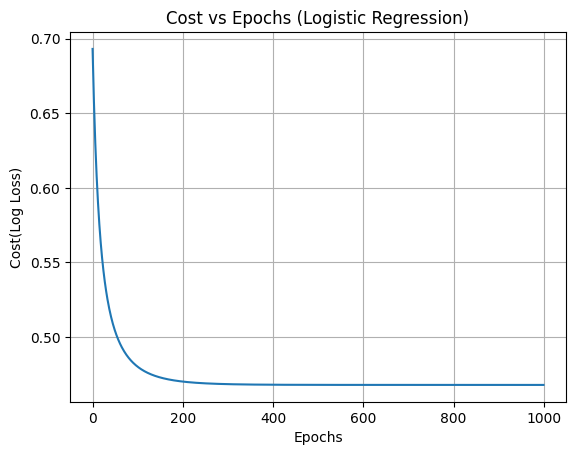

In [8]:
import matplotlib.pyplot as plt

theta , cost_history = gradient_descent_logistic(x_train , y_train , lr=0.1 , epochs=1000)

plt.plot(range(len(cost_history)),cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost(Log Loss)')
plt.title('Cost vs Epochs (Logistic Regression)')
plt.grid(True)
plt.show()

PREDICTION vs ACTUAL ( SCATTER PLOT )

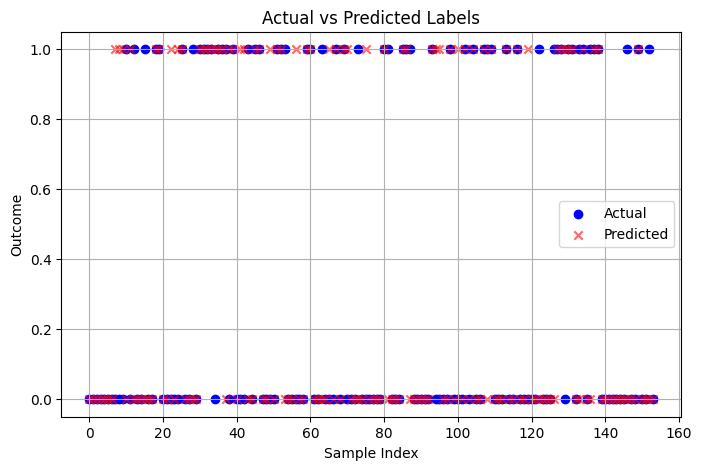

In [9]:
# MAKE PREDICTIONS
x_test_bias = np.c_[np.ones((x_test.shape[0], 1)), x_test]
pred_probs = sigmoid(x_test_bias @ theta)
pred_labels = (pred_probs >= 0.5).astype(int)

#PLOT
plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)),y_test , color='blue',label='Actual')
plt.scatter(range(len(pred_labels)),pred_labels,color='red',alpha=0.6,label='Predicted',marker ='x')
plt.title('Actual vs Predicted Labels')
plt.xlabel('Sample Index')
plt.ylabel('Outcome')
plt.legend()
plt.grid(True)
plt.show()

CONFUSION MATRIX ( WITH HEATMAP )

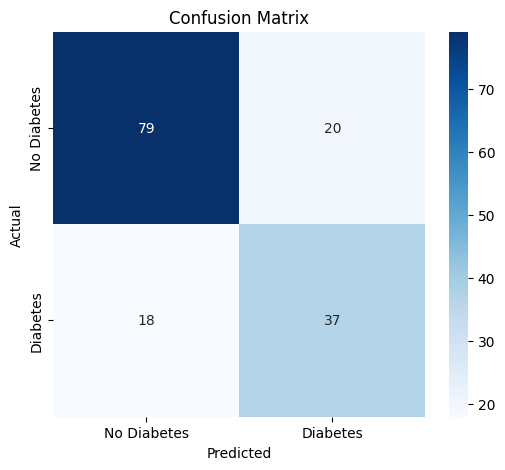

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred_labels)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()